# Kaggle Feb 2021 Tabular Playground

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import math
import joblib

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.feature_selection import mutual_info_regression

from rfpimp import importances, plot_importances

/home/cho/miniconda3/envs/standard_ds/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pd.set_option('display.max_rows', 1000, 'display.max_columns', 1000)

In [3]:
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

In [4]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [5]:
def print_score(m):
    rmse_train = rmse(m.predict(X_train), y_train)
    rmse_valid = rmse(m.predict(X_valid), y_valid)
    rsquared_train = m.score(X_train, y_train)
    rsquared_valid = m.score(X_valid, y_valid)
    print(f'rmse_train: {rmse_train}, rmse_valid: {rmse_valid}, rsquared_train: {rsquared_train}, rsquared_valid: {rsquared_valid}')

In [6]:
input_path = '/home/cho/kaggle_feb21_tabular/input'

In [7]:
output_path = '/home/cho/kaggle_feb21_tabular/output'

In [8]:
model_path = '/home/cho/kaggle_feb21_tabular/models'

In [9]:
df_raw = pd.read_csv(f'{input_path}/train.csv')

In [10]:
df_test = pd.read_csv(f'{input_path}/test.csv')

In [92]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [10]:
df_raw.shape

(300000, 26)

In [20]:
df_raw.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


## Giving categorical variables numerical values

In [11]:
df_proc = df_raw.copy()

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
obj_cols = df_proc.select_dtypes('object')

Replace all of the categorical variables with the label encoder using a loop

In [14]:
for col in obj_cols:
    le.fit(df_proc[col])
    df_proc.loc[:,col] = le.transform(df_raw[col])

In [15]:
df_proc.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,0,1,0,0,1,3,0,4,2,8,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,1,0,0,0,1,1,0,4,0,5,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,0,0,0,2,1,3,0,1,2,13,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,0,0,0,2,1,3,0,4,6,10,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,0,1,0,0,1,1,0,4,2,5,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


### Save the processed dataset

In [37]:
# df_proc.to_csv(f'{input_path}/df_proc.csv')

## Cross-validation 

In [40]:
if __name__ == "__main__":
    df_shuf = df_proc.sample(frac=1).reset_index(drop=True)
    kf = model_selection.KFold(n_splits=5)
    for fold, (trn_, val_) in enumerate(kf.split(X = df_shuf)):
        df_shuf.loc[val_, 'kfold'] = fold
    df_shuf.to_csv(f'{path}/train_folds.csv', index=False)

In [54]:
df_train_folds = pd.read_csv(f'{path}/train_folds.csv')

## Random Forest Regressor

We will split the training dataset to 80% for training and 20% for validation set.

In [16]:
n_valid = int(df_raw.shape[0] * 0.2)
n_trn = df_raw.shape[0] - n_valid

### Shuffled the dataset

We randomly shuffle the rows of the entire raw dataset.

In [48]:
df_shuf = df_proc.sample(frac=1)

In [49]:
df_trn = df_shuf.drop(columns='target')
y_trn = df_shuf['target']

In [50]:
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_shuf, n_trn)

In [24]:
rfr = RandomForestRegressor(n_estimators=100, n_jobs=1)
rfr.fit(X_train, y_train)
print_score(rfr)
# rmse_train: 0.3218218384322269, rmse_valid: 0.8588008298230758, rsquared_train: 0.8684371107468682, rsquared_valid: 0.06349986164922261

### Did not shuffle the dataset

In [17]:
n_valid = int(df_raw.shape[0] * 0.2)
n_trn = df_raw.shape[0] - n_valid

In [18]:
df_trn = df_proc.drop(columns='target')
y_trn = df_proc['target']

In [19]:
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_proc, n_trn)

In [73]:
rfr = RandomForestRegressor(n_estimators=100, n_jobs=1, min_samples_leaf=3, max_features=0.5)
rfr.fit(X_train, y_train)
print_score(rfr)
# rmse_train: 0.43863243149329095, rmse_valid: 0.8568757390017155, rsquared_train: 0.7556997970137097, rsquared_valid: 0.06615361492538452

rmse_train: 0.43863243149329095, rmse_valid: 0.8568757390017155, rsquared_train: 0.7556997970137097, rsquared_valid: 0.06615361492538452


### Save the model

In [20]:
# joblib.dump(rfr, f'{model_path}/model_rfr_v1.bin')

## First submission - Random Forest - No shuffling and with hyperparameters

In [76]:
df_test_raw = pd.read_csv(f'{input_path}/test.csv')

### Change the categorical variables to numerical values following the same encoding from the training set.

In [77]:
df_test = df_test_raw.copy()

In [78]:
for col in obj_cols:
    df_test.loc[:,col] = le.transform(df_test[col])

In [79]:
preds = rfr.predict(df_test)

In [86]:
submission = pd.DataFrame({'id':df_test_raw['id'], 'target':preds})
submission.to_csv(f'{output_path}/submission_v1.csv', index=False)

## Feature importance

### Load the last model used for submission

In [16]:
rfr = joblib.load(f'{model_path}/model_rfr_v1.bin')

In [26]:
imp = importances(rfr, X_valid, y_valid)

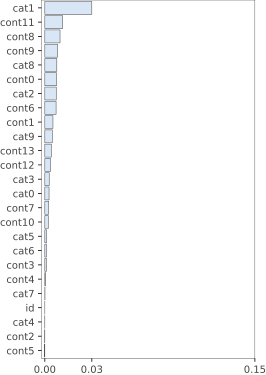

In [29]:
viz = plot_importances(imp)
viz

In [30]:
imp

,Importance
Feature,
cat1,0.033559
cont11,0.012764
cont8,0.010868
cont9,0.009118
cat8,0.008571
cont0,0.008397
cat2,0.008152
cont6,0.008045
cont1,0.005804


Looks like id, cat4, cont2 and cont5 have negative importance, removing them should improve the model

### Retrain the model excluding negative feature importance

In [32]:
n_valid = int(df_raw.shape[0] * 0.2)
n_trn = df_raw.shape[0] - n_valid

In [33]:
df_trn = df_proc.drop(columns='target')
y_trn = df_proc['target']

In [31]:
cols_to_drop = ['id', 'cat4', 'cont2', 'cont5']

In [34]:
df_keep = df_trn.drop(columns=cols_to_drop)

In [40]:
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_proc, n_trn)

In [54]:
rfr = RandomForestRegressor(n_estimators=100, n_jobs=1, min_samples_leaf=3, max_features=0.5)
rfr.fit(X_train, y_train)
print_score(rfr)
# rmse_train: 0.44963296294744187, rmse_valid: 0.856518974553351, rsquared_train: 0.7432924548442283, rsquared_valid: 0.0669310761562184

rmse_train: 0.44963296294744187, rmse_valid: 0.856518974553351, rsquared_train: 0.7432924548442283, rsquared_valid: 0.0669310761562184


Removing the columns made the rmse valid only worse by 0.001, maybe it is ok to do this as it should make the model simpler.  
Let's examine the f

In [60]:
imp = importances(rfr, X_valid, y_valid)

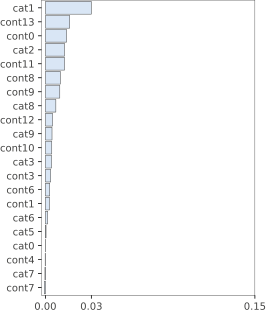

In [90]:
viz = plot_importances(imp)
viz

## Second submission - Random Forest - Less features

In [81]:
df_test_raw = pd.read_csv(f'{input_path}/test.csv')

In [83]:
df_test = df_test_raw.drop(columns=cols_to_drop)

In [89]:
test_obj_cols = df_test.select_dtypes('object').columns

In [91]:
for col in test_obj_cols:
    df_test.loc[:,col] = le.transform(df_test[col])

In [93]:
preds = rfr.predict(df_test)

In [101]:
submission_v2 = pd.DataFrame({'id':df_test_raw['id'],'target':preds})
submission_v2.to_csv(f'{output_path}/submission_v2.csv', index=False)

Second submission did not improve the first and was going to be one place down on the leaderboard. But this means that reducing the features did not make the predictions significantly worse.

## Feature Engineering

### Exploratory Data Analysis

Below tells us that there are no missing values

In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

### Continuous variables

In [17]:
df_raw_stats = df_raw.describe()

In [18]:
df_raw_stats

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


See below seaborn boxplot with stripplot for a visual of the above

<AxesSubplot:>

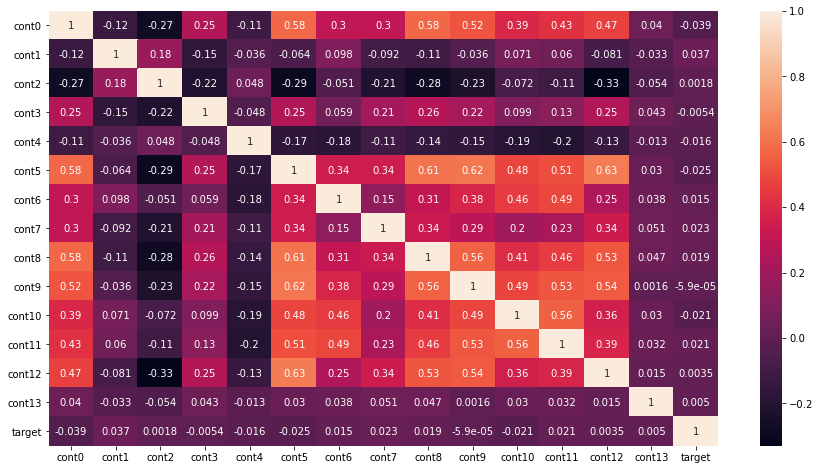

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_raw.select_dtypes('float64').corr(), annot=True)

<AxesSubplot:xlabel='cont5', ylabel='cont12'>

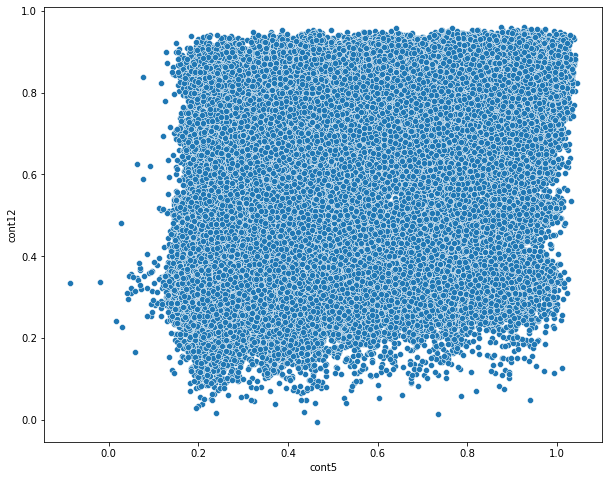

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_raw, x='cont5', y='cont12')

In [30]:
df_raw.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


### Transform the data for visualization

In [103]:
df_raw_melt = df_raw.select_dtypes(exclude='object')
df_raw_melt = df_raw_melt.drop(columns=['target'])
df_raw_melt = df_raw_melt.melt(id_vars='id', var_name='columns')

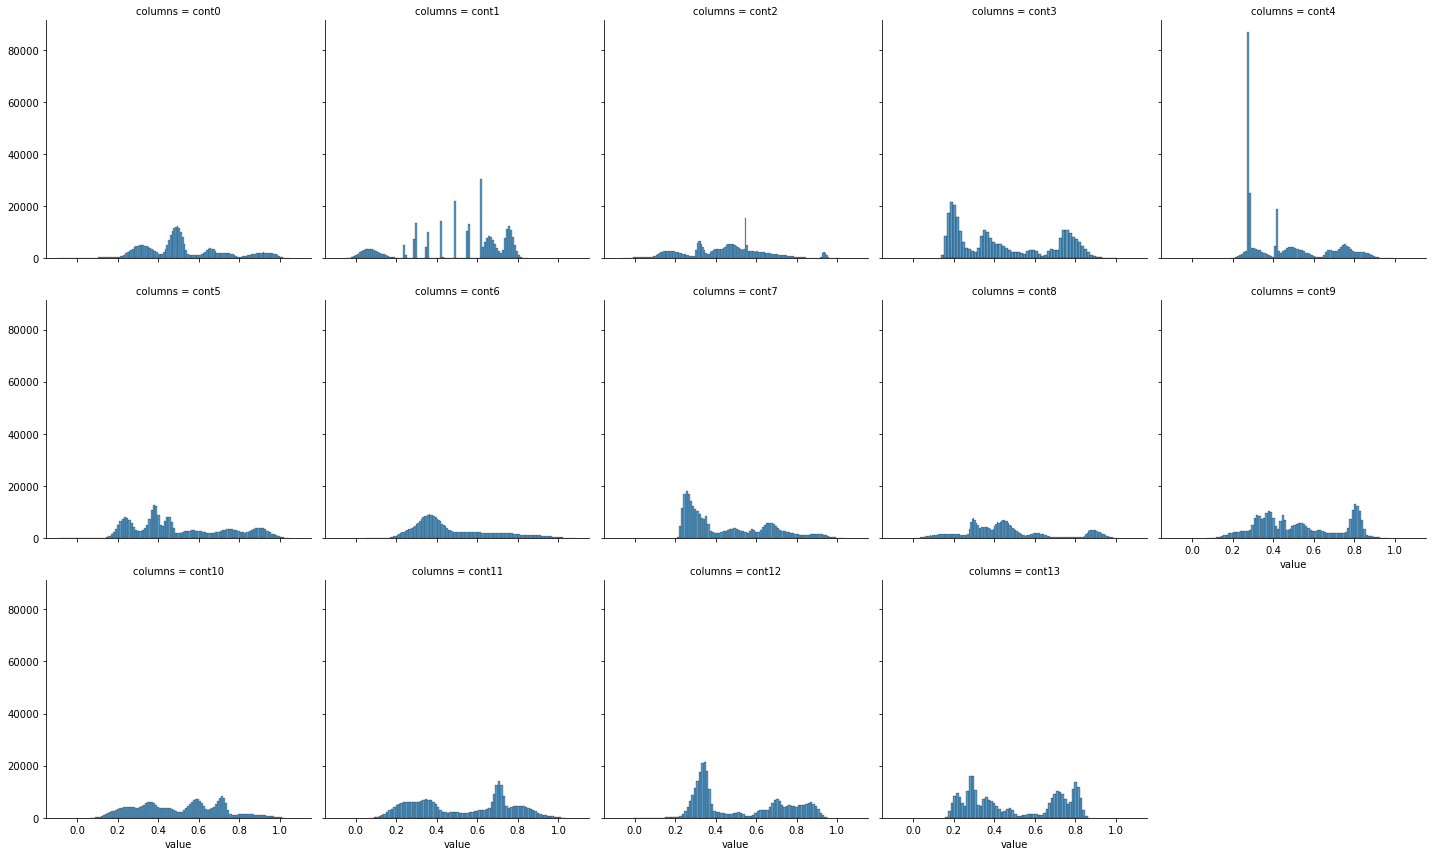

In [104]:
g = sns.FacetGrid(df_raw_melt, col='columns', col_wrap=5, height=4)
g.map(sns.histplot, 'value')

<AxesSubplot:xlabel='cont4', ylabel='Count'>

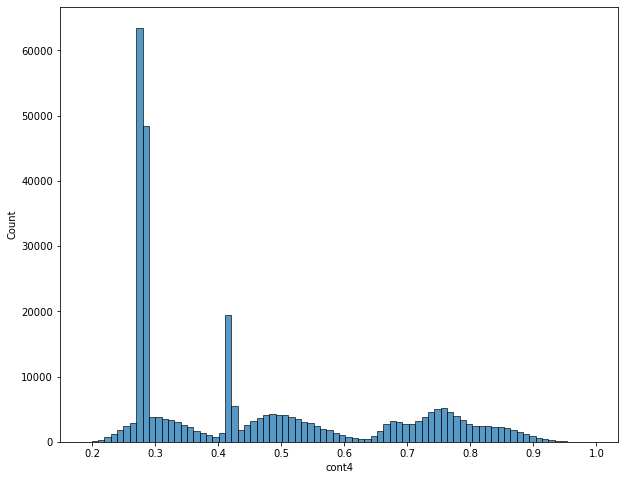

In [90]:
ax, fig = plt.subplots(figsize=(10,8))
sns.histplot(data=df_raw['cont4'], bins=80)

In [209]:
df_raw.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


<AxesSubplot:xlabel='columns', ylabel='value'>

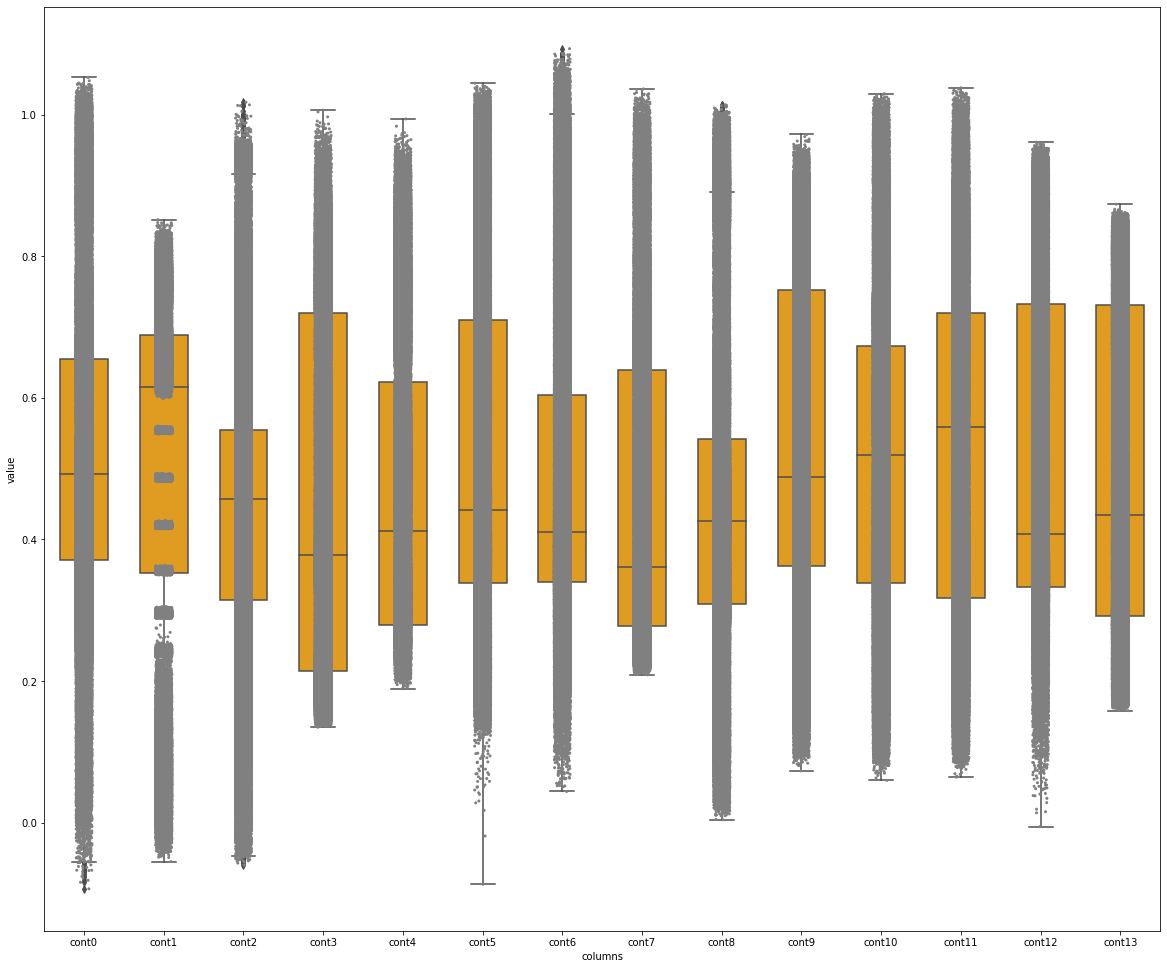

In [208]:
ax, fig = plt.subplots(figsize=(20,17))
sns.boxplot(data=df_raw_melt, x='columns', y='value', color='orange', width=0.6)
sns.stripplot(data=df_raw_melt, x='columns', y='value', color='grey', size=3)

### Categorical variables

We can start examining variables based on feature importance. 

<AxesSubplot:xlabel='cat1', ylabel='count'>

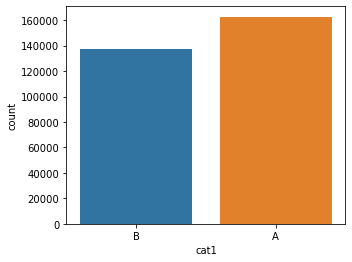

In [81]:
ax, fig = plt.subplots(figsize=(5,4))
sns.countplot(data=df_raw, x='cat1')

In [82]:
df_raw.groupby('cat1').describe()['target']

,count,mean,std,min,25%,50%,75%,max
cat1,,,,,,,,
A,162678.0,7.357097,0.861643,2.648898,6.727547,7.354405,8.055889,10.185468
B,137322.0,7.573734,0.902771,0.000000,6.900073,7.662078,8.272455,10.309208


### Mutual information

In [155]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  int64  
 2   cat1    300000 non-null  int64  
 3   cat2    300000 non-null  int64  
 4   cat3    300000 non-null  int64  
 5   cat4    300000 non-null  int64  
 6   cat5    300000 non-null  int64  
 7   cat6    300000 non-null  int64  
 8   cat7    300000 non-null  int64  
 9   cat8    300000 non-null  int64  
 10  cat9    300000 non-null  int64  
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [157]:
df_proc.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,0,1,0,0,1,3,0,4,2,8,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,1,0,0,0,1,1,0,4,0,5,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,0,0,0,2,1,3,0,1,2,13,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,0,0,0,2,1,3,0,4,6,10,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,0,1,0,0,1,1,0,4,2,5,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [119]:
def make_mi_scores(df, y, discrete_features):
    mi_scores = mutual_info_regression(df, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [161]:
df_proc_test = df_proc.sample(100, random_state=10)

In [162]:
discrete_features = df_proc_test.select_dtypes('int').columns

In [16]:
mi_scores = mutual_info_regression(df_proc.sample(1000, random_state=100), df_proc.sample(1000, random_state=100)['target'])

In [17]:
mi_scores

array([0.00000000e+00, 1.37021119e-02, 3.38773116e-02, 1.30736206e-02,
       9.83604060e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.39808493e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.57819357e-02, 0.00000000e+00,
       1.41934140e-02, 1.92927678e-02, 1.08225540e-02, 3.45755070e-02,
       0.00000000e+00, 0.00000000e+00, 1.07881194e-02, 5.87747925e-04,
       3.44090405e-02, 5.65113753e+00])

### Continuous variables

#### Binning the top features based on feature importance

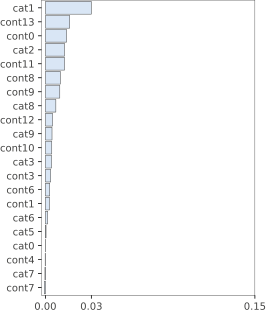

In [90]:
viz = plot_importances(imp)
viz

In [23]:
df_proc.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,0,1,0,0,1,3,0,4,2,8,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,1,0,0,0,1,1,0,4,0,5,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,0,0,0,2,1,3,0,1,2,13,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,0,0,0,2,1,3,0,4,6,10,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,0,1,0,0,1,1,0,4,2,5,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


<AxesSubplot:xlabel='cont13', ylabel='Count'>

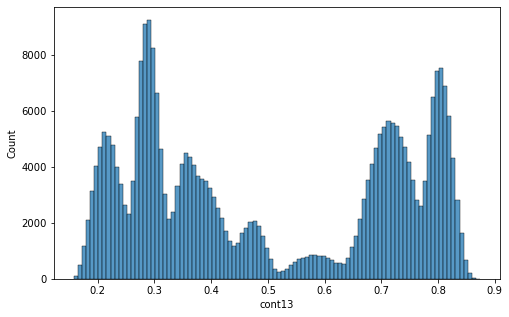

In [30]:
ax, fig = plt.subplots(figsize=(8,5))
sns.histplot(df_proc['cont13'], bins=100)

<AxesSubplot:xlabel='cont0', ylabel='Count'>

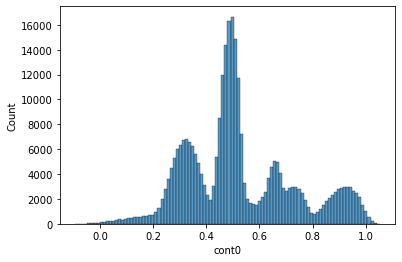

In [52]:
sns.histplot(df_proc['cont0'], bins=100)

<AxesSubplot:xlabel='cont11', ylabel='Count'>

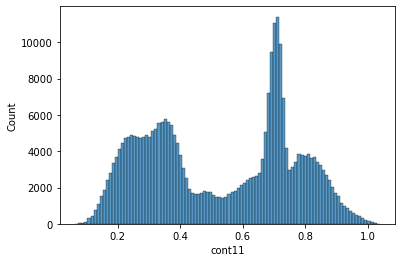

In [66]:
sns.histplot(df_proc['cont11'], bins=100)

<AxesSubplot:xlabel='cont8', ylabel='Count'>

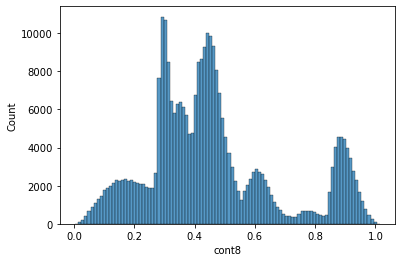

In [67]:
sns.histplot(df_proc['cont8'], bins=100)

<AxesSubplot:xlabel='cont9', ylabel='Count'>

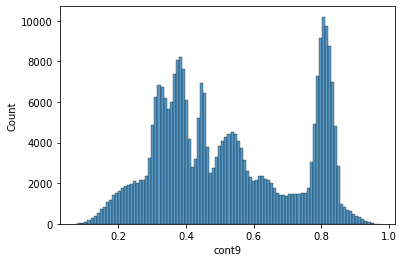

In [68]:
sns.histplot(df_proc['cont9'], bins=100)

In [80]:
df_proc['cont13_bin'] = pd.cut(df_proc['cont13'], bins=10, labels=False)
df_proc['cont0_bin'] = pd.cut(df_proc['cont0'], bins=10, labels=False)
df_proc['cont11_bin'] = pd.cut(df_proc['cont11'], bins=20, labels=False)
df_proc['cont8_bin'] = pd.cut(df_proc['cont8'], bins=10, labels=False)
df_proc['cont9_bin'] = pd.cut(df_proc['cont9'], bins=20, labels=False)

## Train the model with binned variables

In [81]:
n_valid = int(df_raw.shape[0] * 0.2)
n_trn = df_raw.shape[0] - n_valid

In [82]:
df_trn = df_proc.drop(columns='target')
y_trn = df_proc['target']

In [93]:
cols_to_drop = ['id', 'cont13', 'cont0', 'cont11', 'cont8', 'cont9']

In [94]:
df_keep = df_trn.drop(columns=cols_to_drop)

In [95]:
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, n_jobs=1, min_samples_leaf=3, max_features=0.5)
rfr.fit(X_train, y_train)
print_score(rfr)
# rmse_train: 0.44963296294744187, rmse_valid: 0.856518974553351, rsquared_train: 0.7432924548442283, rsquared_valid: 0.0669310761562184